In [10]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import glob as glob
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

class CancerDetectModel(nn.Module):
    def __init__(self):
        super(CancerDetectModel, self).__init__()
        self.name = "CancerDetectModel"
        self.conv1 = torch.nn.Conv2d(3, 32, 5, 5)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.conv3 = torch.nn.Conv2d(64, 128, 4, 2)
        self.fc = nn.Linear(3 * 3 * 128, 2)
    
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = x.view(-1, 3 * 3 * 128)
        x = self.fc(x)
        return x

Classification: 1
Classification: 1


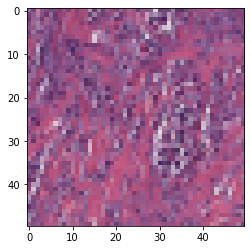

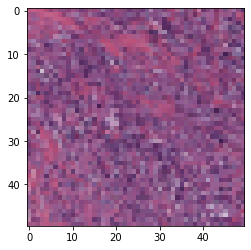

In [11]:
pos_image_dir = "./demo_images/1/*.png"
neg_image_dir = "./demo_images/0/*.png"

best_model = CancerDetectModel()
model_path = "./model_files/model_CancerDetectModel_bs64_lr0.001_epoch2"
state = torch.load(model_path)
best_model.load_state_dict(state)

for file in glob.glob(pos_image_dir):
    image = plt.imread(file)
    plt.figure()
    plt.imshow(image)
    tensor = torch.from_numpy(image)
    result = torch.argmax(best_model(torch.unsqueeze(tensor.transpose(0,2), 0))).item()
    print("Classification: {}".format(result))

Classification: 0
Classification: 0


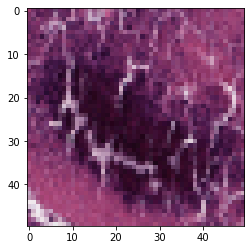

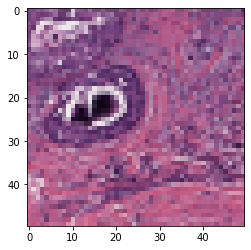

In [12]:
for file in glob.glob(neg_image_dir):
    image = plt.imread(file)
    plt.figure()
    plt.imshow(image)
    tensor = torch.from_numpy(image)
    result = torch.argmax(best_model(torch.unsqueeze(tensor.transpose(0,2), 0))).item()
    print("Classification: {}".format(result))